# Final Results

In [54]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file, cross_validation
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [55]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

In [56]:
test_frac = 1/4

### Importing training and blind test set.

In [57]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

names_test = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10']

df_test = pd.read_csv(f"{DIR}data/ML-CUP23-TS.csv", names=names_test, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round((1-test_frac) * df.shape[0])

X_train, y_train = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test, y_test = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

X_blind_test = df_test[features].to_numpy().T

### Best parameter combination:

In [80]:
best_params = {'eta': 0.001,
            'lam': 3e-05,
            'alpha': 0.9,
            'epochs': 500,
            'n_batch': 150,
            'scale_eta_batchsize': None,
            'dim_hidden': 70,
            'hidden_act_func': 'tanh',
            'dim_hidden2': 70,
            'hidden_act_func2': 'tanh',
            'use_opt': 0,
            'loss': 'MSE',
            'output_act_func': 'lin',
            'nest': True,
            }


### Cross validation

In [59]:
history_cv = cross_validation(X_train, y_train, folds=5, metrics=[MEE], params=best_params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})

In [60]:
print(history_cv)

{'train_loss_mean': 0.25480430266237875, 'train_loss_std': 0.0066180402759764365, 'val_loss_mean': 0.5283306144367964, 'val_loss_std': 0.15485615040433304, 'train_MEE_mean': 0.692517436479362, 'train_MEE_std': 0.005851215083652159, 'val_MEE_mean': 0.9319407548517976, 'val_MEE_std': 0.06531931061399407}


### Error evaluation

In [81]:
params = best_params.copy()
params.pop('scale_eta_batchsize')
input_layer = Input(X_train.shape[0])
hidden_layer = Layer(input_layer, params.pop('dim_hidden'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'dim_hidden{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'dim_hidden{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

In [82]:
history = model.retrain(X_train, y_train.reshape((3,X_train.shape[1])), test_data = [X_test,y_test.reshape((3,X_test.shape[1]))], **params)

Epoch 0: train_loss: 4.046e+02, test_loss: 4.103e+02; train_MEE: 2.931e+01, test_MEE: 2.963e+01  lr : 0.002
Epoch 1: train_loss: 7.196e+01, test_loss: 7.594e+01; train_MEE: 1.245e+01, test_MEE: 1.282e+01  lr : 0.002
Epoch 2: train_loss: 2.901e+01, test_loss: 2.941e+01; train_MEE: 8.362e+00, test_MEE: 8.413e+00  lr : 0.002
Epoch 3: train_loss: 1.723e+01, test_loss: 1.697e+01; train_MEE: 6.156e+00, test_MEE: 6.278e+00  lr : 0.002
Epoch 4: train_loss: 1.075e+01, test_loss: 9.532e+00; train_MEE: 4.746e+00, test_MEE: 4.706e+00  lr : 0.002
Epoch 5: train_loss: 7.632e+00, test_loss: 6.328e+00; train_MEE: 3.935e+00, test_MEE: 3.843e+00  lr : 0.002
Epoch 6: train_loss: 5.815e+00, test_loss: 5.159e+00; train_MEE: 3.411e+00, test_MEE: 3.431e+00  lr : 0.002
Epoch 7: train_loss: 4.645e+00, test_loss: 4.326e+00; train_MEE: 2.964e+00, test_MEE: 3.092e+00  lr : 0.002
Epoch 8: train_loss: 3.893e+00, test_loss: 3.646e+00; train_MEE: 2.668e+00, test_MEE: 2.838e+00  lr : 0.002
Epoch 9: train_loss: 3.398e+

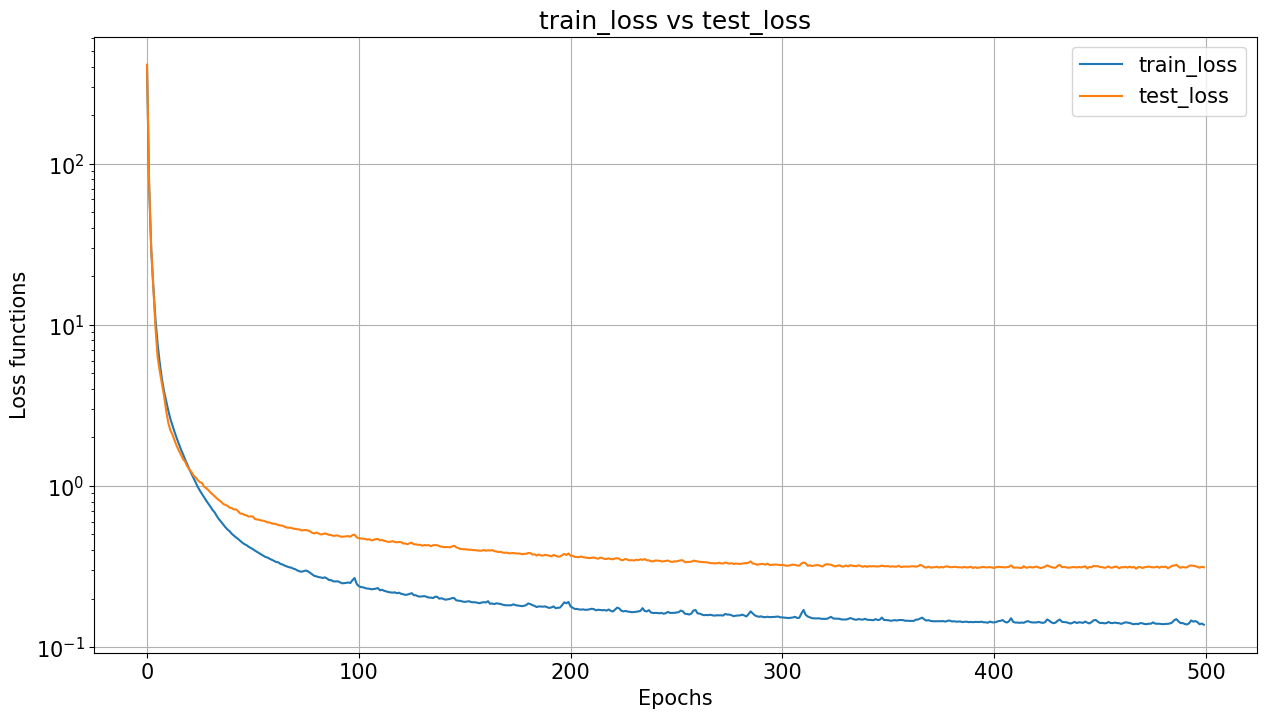

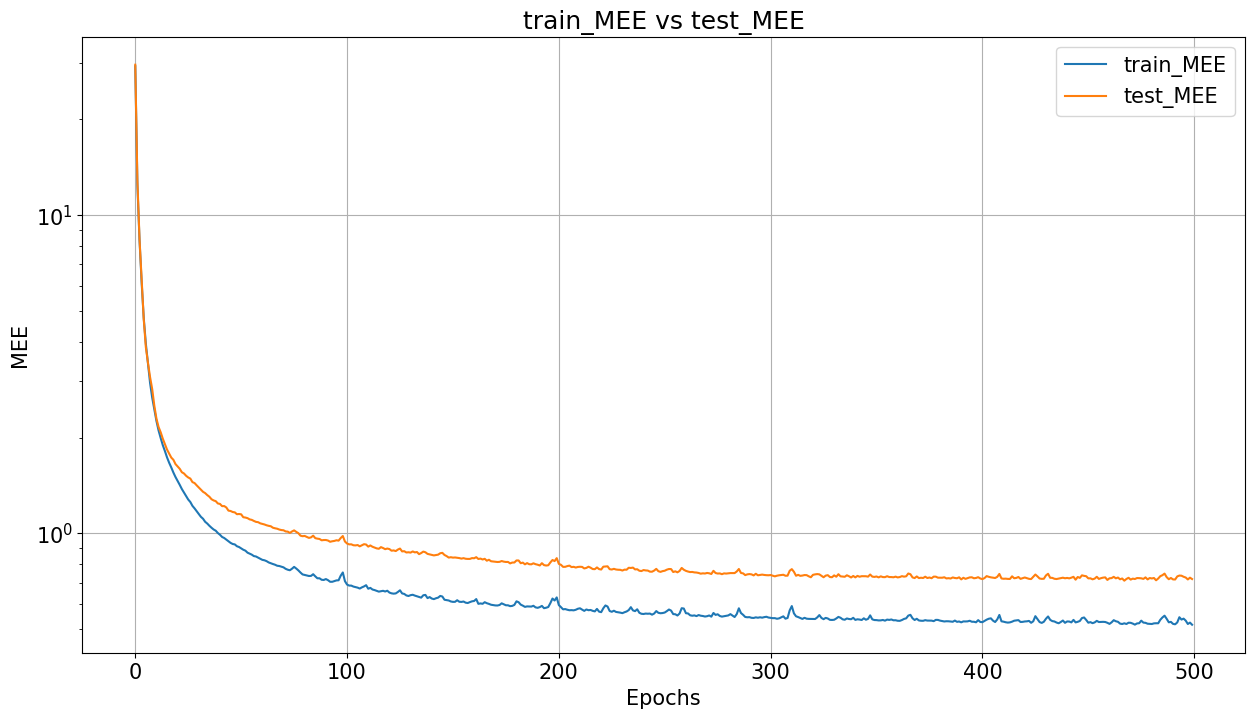

In [83]:
plt.figure(1,figsize=(15,8))
plt.plot(history['train_loss'],label='train_loss')
plt.plot(history['test_loss'], label='test_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs test_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

plt.figure(2,figsize=(15,8))
plt.plot(history['train_MEE'],label='train_MEE')
plt.plot(history['test_MEE'], label='test_MEE')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs test_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Blind test prediction

In [64]:
output = model.predict(X_blind_test)

In [71]:
df = pd.DataFrame(output.T)
df.index = df.index +1

In [73]:
df.to_csv(f"{DIR}data/output/output.csv")